In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv("../Useful_csv_files/audio_features_and_popularity_scores_new.csv")
df.columns

Index(['artist_names', 'track_name', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'popularity_score1',
       'popularity_score2', 'streams', 'release_week', 'weeks_after_release',
       'occurence_percentage', 'log_occurence', 'normalized_streams',
       'popularity_score_log', 'popularity_log_normalized'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
0.8*len(df)

811.2

In [31]:
data = df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'popularity_log_normalized']]

X = data.drop(columns=['popularity_log_normalized'])
y = data['popularity_log_normalized']

# Train-test split (0.8 - 0.2 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the improved neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=8,
                    callbacks=[callback, early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

# Predictions
predictions = model.predict(X_test)

# Save the model if needed
#model.save('audio_features_to_popularity_model_improved.h5')
predictions_list = [pred[0] for pred in predictions]
pred_df = pd.DataFrame({"predictions" : predictions_list, "actual" : y_test.values})
pred_df

Epoch 1/30
81/81 [==============================] - 3s 12ms/step - loss: 2103.4246 - mae: 41.8138 - val_loss: 2171.4568 - val_mae: 42.5695 - lr: 0.0010
Epoch 2/30
81/81 [==============================] - 0s 6ms/step - loss: 2009.0627 - mae: 40.7498 - val_loss: 2028.9832 - val_mae: 40.9022 - lr: 0.0010
Epoch 3/30
81/81 [==============================] - 0s 6ms/step - loss: 1886.9740 - mae: 39.3268 - val_loss: 1837.9551 - val_mae: 38.5647 - lr: 0.0010
Epoch 4/30
81/81 [==============================] - 0s 6ms/step - loss: 1694.8889 - mae: 36.8399 - val_loss: 1604.0579 - val_mae: 35.4443 - lr: 0.0010
Epoch 5/30
81/81 [==============================] - 0s 5ms/step - loss: 1457.2424 - mae: 33.5609 - val_loss: 1316.4817 - val_mae: 31.2343 - lr: 0.0010
Epoch 6/30
81/81 [==============================] - 1s 7ms/step - loss: 1153.4744 - mae: 28.9875 - val_loss: 1026.8955 - val_mae: 26.7708 - lr: 0.0010
Epoch 7/30
81/81 [==============================] - 0s 5ms/step - loss: 904.3994 - mae: 24.97

,predictions,actual
0,34.922688,47.826851
1,30.813173,38.613234
2,49.521023,53.179884
3,46.033337,38.781586
4,40.647526,54.351833
...,...,...
198,40.894058,54.157725
199,44.325146,81.443627
200,35.012302,49.421171
201,40.090496,10.536486


In [33]:
data = df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'popularity_log_normalized']]

X = data.drop(columns=['popularity_log_normalized'])
y = data['popularity_log_normalized']

# Train-test split (0.8 - 0.2 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the improved neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

# Predictions
predictions = model.predict(X_test)

# Save the model if needed
#model.save('audio_features_to_popularity_model_improved.h5')
predictions_list = [pred[0] for pred in predictions]
pred_df = pd.DataFrame({"predictions" : predictions_list, "actual" : y_test.values})
pred_df

Epoch 1/100
21/21 [==============================] - 2s 20ms/step - loss: 2065.3318 - mae: 41.3816 - val_loss: 2106.6575 - val_mae: 41.8159
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 1884.1270 - mae: 39.1061 - val_loss: 1866.9966 - val_mae: 38.8438
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 1603.0192 - mae: 35.3207 - val_loss: 1504.2931 - val_mae: 33.8750
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 1216.2351 - mae: 29.5421 - val_loss: 1055.2118 - val_mae: 27.0825
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 827.1180 - mae: 23.2565 - val_loss: 667.8691 - val_mae: 20.5788
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 555.1920 - mae: 18.8728 - val_loss: 474.4442 - val_mae: 17.0199
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 457.4473 - mae: 17.3848 - val_loss: 421.4824 - val_mae: 16.1230
Epoch 8/100
21/21 [=============

,predictions,actual
0,39.981682,47.826851
1,35.416477,38.613234
2,48.159405,53.179884
3,40.359402,38.781586
4,37.319134,54.351833
...,...,...
198,33.952267,54.157725
199,39.889637,81.443627
200,34.227551,49.421171
201,42.714695,10.536486


# Trying the 30-second samples

In [5]:
df

,artist_names,track_name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,popularity_score1,popularity_score2,streams,release_week,weeks_after_release,occurence_percentage,log_occurence,normalized_streams,popularity_score_log,popularity_log_normalized
0,Bagossy Brothers Company,Olyan Ő,spotify:track:0VTjzV78c7fn1uo1ApOSkg,0.775,0.510,5,-6.043,1,0.0303,0.18500,...,0.032332,0.079022,278,2019-01-24,286,97.202797,4.576799,0.007064,-2.230590,76.220257
1,Eminem,Without Me,spotify:track:7lQ8MOhq6IN2w8EYcFNSUk,0.908,0.669,7,-2.827,1,0.0738,0.00286,...,0.017148,0.041411,260,2019-01-03,289,89.965398,4.499425,0.003811,-2.876767,57.163727
2,"Dzsúdló, Lil Frakk",Lej,spotify:track:4FATnhRDq5PbfkZMafDuxb,0.790,0.503,1,-9.301,1,0.2060,0.52700,...,0.033573,0.079480,233,2019-11-21,243,95.884774,4.563147,0.007357,-2.224807,76.390781
3,Halott Pénz,Amikor Feladnád,spotify:track:5pZDYdwuEWlCT2Rs7mNyvW,0.737,0.810,1,-3.683,1,0.0772,0.03910,...,0.022289,0.052514,227,2019-04-04,276,82.246377,4.409719,0.005055,-2.639228,64.169023
4,The Weeknd,Blinding Lights,spotify:track:0sf12qNH5qcw8qpgymFOqD,0.512,0.796,1,-4.075,1,0.0645,0.00147,...,0.039152,0.092093,225,2019-12-05,241,93.360996,4.536474,0.008631,-2.077515,80.734601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,Zara Larsson,Lush Life,spotify:track:1rIKgCH4H52lrvDcz50hS8,0.694,0.712,7,-3.923,0,0.0460,0.13200,...,0.008465,0.009956,15,2019-01-03,289,5.190311,1.646794,0.005141,-4.302130,15.128069
1010,Zara Larsson,Ruin My Life,spotify:track:5tAa8Uaqr4VvA3693mbIhU,0.665,0.699,11,-5.265,1,0.0578,0.42300,...,0.007710,0.009067,15,2019-01-03,289,5.190311,1.646794,0.004682,-4.395631,12.370633
1011,"BERRY, T. Danny",Vámpír,spotify:track:3W0Nlg1cO7ZY56vye5VV8E,0.797,0.663,5,-6.968,1,0.0376,0.76800,...,0.012308,0.014475,15,2022-10-27,90,16.666667,2.813411,0.004375,-3.927861,26.165697
1012,Justin Bieber,Hold On,spotify:track:4u4NyuceXP7Uzh7XFJKCr1,0.658,0.634,1,-5.797,0,0.0413,0.01060,...,0.012978,0.015264,15,2021-03-11,175,8.571429,2.148434,0.006041,-3.874838,27.729428


In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotify API credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="20ddf5269e214f479a81bd27929af65c",
                                                   client_secret="736f0184659740f7add037072c214e5f"))

# Get track preview URLs (30-second samples)
track_id = '1rIKgCH4H52lrvDcz50hS8'
track_info = sp.track(track_id)
preview_url = track_info['preview_url']


In [7]:
track_info

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xylc3o4UrD53lo9CvFvVg'},
    'href': 'https://api.spotify.com/v1/artists/1Xylc3o4UrD53lo9CvFvVg',
    'id': '1Xylc3o4UrD53lo9CvFvVg',
    'name': 'Zara Larsson',
    'type': 'artist',
    'uri': 'spotify:artist:1Xylc3o4UrD53lo9CvFvVg'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'MA',
   'DZ',
   'TN',
   'IN',
   'BY',
   'KZ',

There are no preview urls for a few songs.

In [52]:
import requests
import librosa
import numpy as np

# Download audio sample
response = requests.get(preview_url)
with open('sample.mp3', 'wb') as f:
    f.write(response.content)

# Load audio sample
y, sr = librosa.load('sample.mp3', sr=None)


In [53]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

In [58]:
mfccs

array([[-121.6858    ,  -30.185213  ,    8.343388  , ...,   -7.850377  ,
         -30.418285  , -120.93275   ],
       [ 127.46472   ,  128.68698   ,  135.79193   , ...,  156.18198   ,
         156.89107   ,  145.85953   ],
       [  -3.034146  ,  -15.34908   ,  -22.045197  , ...,  -56.8775    ,
         -47.79711   ,  -29.789953  ],
       ...,
       [  -1.9277867 ,   -7.148397  ,   -3.8741639 , ...,    0.53369415,
           1.2123497 ,    2.0957198 ],
       [ -16.252792  ,  -10.859191  ,   -5.1400785 , ...,    8.720003  ,
          11.863615  ,    5.9021835 ],
       [  -6.529875  ,   -6.81554   ,   -3.345325  , ...,   10.082209  ,
           7.626707  ,    6.952519  ]], dtype=float32)

In [62]:
len(mfccs), len(mfccs[1])

(13, 2560)

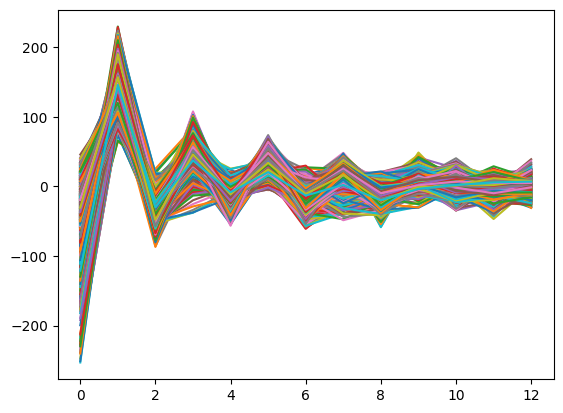

In [65]:
plt.plot(mfccs)
plt.show()

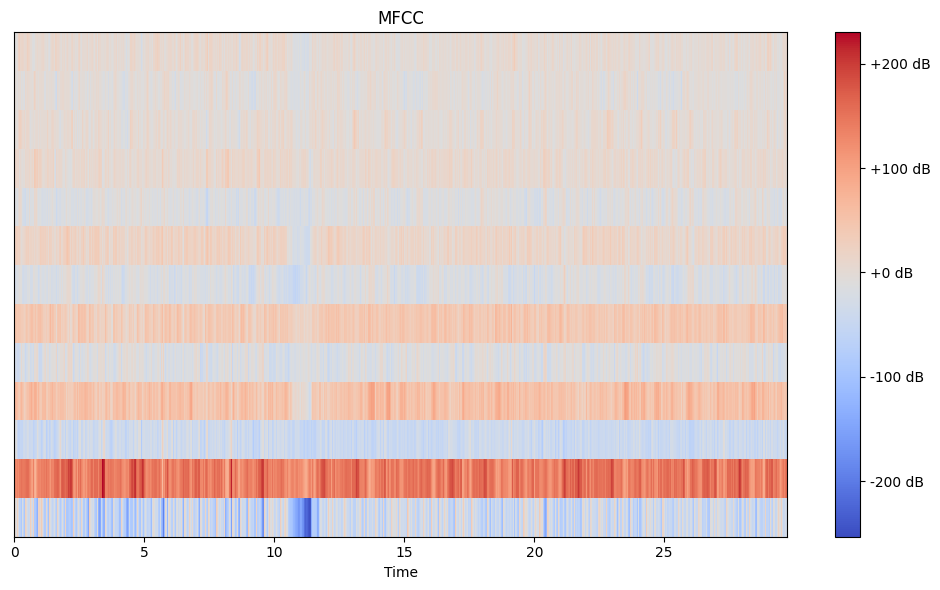

In [68]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [67]:
len(mfccs.flatten())

33280

In [8]:
preview_url1 = sp.track("1rIKgCH4H52lrvDcz50hS8")["preview_url"]
preview_url2 = sp.track("5tAa8Uaqr4VvA3693mbIhU")["preview_url"]

In [10]:
preview_url2

'https://p.scdn.co/mp3-preview/54e95818869dc3a3b81a15325dce6598557e3dff?cid=20ddf5269e214f479a81bd27929af65c'

# Comparing two 30 second samples

In [12]:
import requests
import librosa
import numpy as np

response1 = requests.get(preview_url1) #Zara Larsson : Lush Life
with open('sample1.mp3', 'wb') as f:
    f.write(response1.content)

response2 = requests.get(preview_url2) #Zara Larsson : Ruin my Life
with open('sample2.mp3', 'wb') as f:
    f.write(response2.content)

In [22]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean, cosine

# Example: compare MFCCs of two audio samples
y1, sr1 = librosa.load('sample1.mp3', sr=None)
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)

y2, sr2 = librosa.load('sample2.mp3', sr=None)
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)

# Flatten the MFCCs for comparison
mfccs1_flat = mfccs1.flatten()
mfccs2_flat = mfccs2.flatten()

# Compute DTW distance
distance, path = fastdtw(mfccs1, mfccs2, dist=euclidean)
print(f'DTW distance between samples: {distance}')

DTW distance between samples: 17065.17814182618


In [24]:
cosine(mfccs1_flat, mfccs2_flat)

0.18017059564590454

# CHecking the preview urls

In [30]:
track_ids = df["id"].values
track_ids

array(['0VTjzV78c7fn1uo1ApOSkg', '7lQ8MOhq6IN2w8EYcFNSUk',
       '4FATnhRDq5PbfkZMafDuxb', ..., '3W0Nlg1cO7ZY56vye5VV8E',
       '4u4NyuceXP7Uzh7XFJKCr1', '6wQlQrTY5mVS8EGaFZVwVF'], dtype=object)

In [33]:
import time
from tqdm import tqdm

In [34]:
preview_urls = []
for id in tqdm(track_ids, desc="Processing songs"):
    preview_urls.append(sp.track(id)["preview_url"])
    time.sleep(1.5)

Processing songs: 100%|██████████| 1014/1014 [27:10<00:00,  1.61s/it]


In [35]:
preview_urls

[None,
 None,
 None,
 'https://p.scdn.co/mp3-preview/62b6f22425c33dffd599bc0d92b90045fd045c45?cid=20ddf5269e214f479a81bd27929af65c',
 None,
 None,
 'https://p.scdn.co/mp3-preview/8c9523a2742ba6dc93ce1d719e9daa8aaedaa3d8?cid=20ddf5269e214f479a81bd27929af65c',
 'https://p.scdn.co/mp3-preview/d746c8bdaf756f1aa07d925dfb06e285baf104ad?cid=20ddf5269e214f479a81bd27929af65c',
 'https://p.scdn.co/mp3-preview/877602f424a9dea277b13301ffc516f9fd1fbe7e?cid=20ddf5269e214f479a81bd27929af65c',
 None,
 'https://p.scdn.co/mp3-preview/73d3a5fb7ed936b8ccd7a2729a3465ccfa6503f9?cid=20ddf5269e214f479a81bd27929af65c',
 'https://p.scdn.co/mp3-preview/0369cb748bc968ffd34fb4ac60f5403f2aad032f?cid=20ddf5269e214f479a81bd27929af65c',
 'https://p.scdn.co/mp3-preview/be4eafd68b1f2ff86b6feff95e95e95f3ca077be?cid=20ddf5269e214f479a81bd27929af65c',
 'https://p.scdn.co/mp3-preview/1fea436baf9660f2c5d4a8b29dc49e89f3991fb3?cid=20ddf5269e214f479a81bd27929af65c',
 None,
 'https://p.scdn.co/mp3-preview/b760f738aa81a0c665f8b85

In [39]:
preview_url_df = pd.DataFrame({"id" : track_ids, "preview_url" : preview_urls})
preview_url_df

,id,preview_url
0,0VTjzV78c7fn1uo1ApOSkg,None
1,7lQ8MOhq6IN2w8EYcFNSUk,None
2,4FATnhRDq5PbfkZMafDuxb,None
3,5pZDYdwuEWlCT2Rs7mNyvW,https://p.scdn.co/mp3-preview/62b6f22425c33dff...
4,0sf12qNH5qcw8qpgymFOqD,None
...,...,...
1009,1rIKgCH4H52lrvDcz50hS8,https://p.scdn.co/mp3-preview/2f14e67d96608158...
1010,5tAa8Uaqr4VvA3693mbIhU,https://p.scdn.co/mp3-preview/54e95818869dc3a3...
1011,3W0Nlg1cO7ZY56vye5VV8E,None
1012,4u4NyuceXP7Uzh7XFJKCr1,None


In [40]:
preview_url_df.isna().sum()

id               0
preview_url    425
dtype: int64

In [41]:
preview_url_df.to_csv("preview_url_df.csv", index = False)